In [1]:
import os
import argparse
import re

import numpy as np
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# from matplotlib import rc
# rc('font', family='Times New Roman', size='20')

In [29]:
issave = True

## Loss vs epoch

In [38]:
def plot_dual(los_trn, los_val, acc_val):
    fig, ax_acc = plt.subplots(figsize=(8, 5))
    cm = plt.cm.tab20(np.arange(0, 20))

    cl_acc = cm[6]
    l2 = ax_acc.plot(np.arange(1, 31), acc_val, '-', color=cl_acc, label='Val IoU')
    ax_acc.set_xlabel('Train Epoch')
    ax_acc.set_xlim([1, 30])
    ax_acc.set_ylabel('Accuracy (\%)', color=cl_acc)
    ax_acc.set_ylim([0, 75])
    ax_acc.tick_params(axis='y', labelcolor=cl_acc)
    ax_acc.grid(True, ls='--')
    # ax_omg.set_title('$\\theta$ and $\omega$ over time')

    ax_los = ax_acc.twinx()
    cl_los = cm[0]
    l3 = ax_los.plot(np.arange(1, 31), los_trn, '--', color=cl_los, label='Train Loss')
    l4 = ax_los.plot(np.arange(1, 31), los_val, '-', color=cl_los, label='Val Loss')
    ax_los.set_ylabel('Loss', color=cl_los)
    ax_los.set_ylim([0, max(los_trn + los_val)])
    ax_los.tick_params(axis='y', labelcolor=cl_los)
    ax_los.grid(False)
    
    acc_b = max(acc_val)
    epoch_b = acc_val.index(acc_b)
    loss_b = los_val[epoch_b]
    ax_acc.plot([epoch_b, epoch_b], [-5, 105], ':', color=cm[14])
    ax_acc.plot([epoch_b], [acc_b], 'o', color=cl_acc)
    ax_los.plot([epoch_b], [loss_b], 'o', color=cl_los)
    textstr = '\n'.join((
        r'Epoch: %d' % (epoch_b, ),
        r'IoU: %.2f' % (acc_b, ),
        r'Loss: %.2f' % (loss_b, )))
    props = dict(boxstyle='square', ec=[0.8]*3, facecolor='white')
    if epoch_b/40 < 0.8:
        x_txt = epoch_b/40 + 0.03
    else:
        x_txt = epoch_b/40 - 0.18
    ax_acc.text(x_txt, 0.58, textstr, transform=ax_acc.transAxes,
        verticalalignment='center', bbox=props, fontsize=12)
    
    lst = l2 + l3 + l4
    lbst = [l.get_label() for l in lst]
    ax_acc.legend(lst, lbst, ncol=1, 
                  columnspacing=0.9, handlelength=1.4, handletextpad=0.5,
                  fontsize=12, loc=4)

    fig.tight_layout()
    plt.show()
    return fig

def plot_dual_call(dir_save, dir_flag):
    file_log = os.path.join(dir_save, dir_flag, 'log.txt')
    with open(file_log, 'r') as f:
        s = f.read()

    it_tra = re.finditer(
        r' trn loss:(\d+\.\d+), trn acc:', s)
    loss_tra = []
    for i in it_tra:
        loss_tra.append(float(i.group(1)))

    it_val = re.finditer(
        r' val loss:(\d+\.\d+), val iou:(\d+\.\d+)', s)
    loss_val, acc_val = [], []
    for i in it_val:
        loss_val.append(float(i.group(1)))
        acc_val.append(100 * float(i.group(2)))
    
    fig = plot_dual(loss_tra[:30], loss_val[:30], acc_val[:30])
    if issave:
        fig.savefig('./figs/curve_{}.pdf'.format(dir_flag), bbox_inches='tight')
    return fig

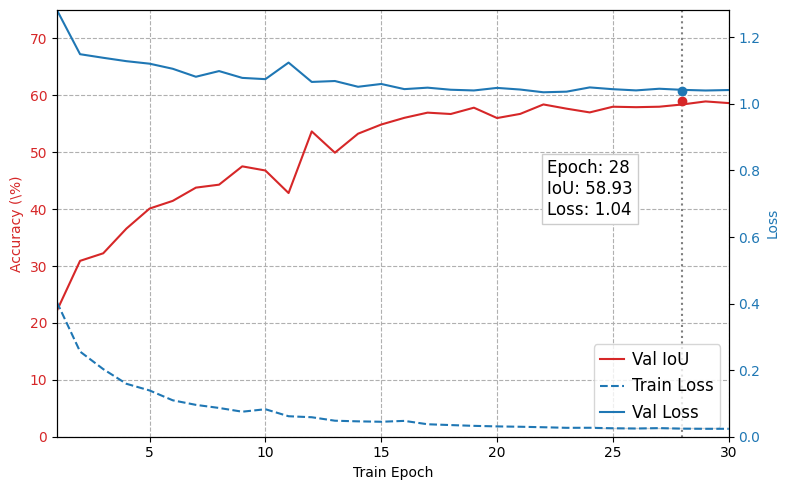

In [39]:
dir_save = '../saved_models/'
dir_flag = 'unet/focalloss_1114'
fig = plot_dual_call(dir_save, dir_flag)

In [30]:
def get_log(dir_flag):
    file_log = os.path.join('../saved_models/', dir_flag, 'log.txt')
    with open(file_log, 'r') as f:
        s = f.read()

    it_tra = re.finditer(
        r' trn loss:(\d+\.\d+), trn acc:', s)
    loss_tra = []
    for i in it_tra:
        loss_tra.append(float(i.group(1)))

    it_val = re.finditer(
        r' val loss:(\d+\.\d+), val iou:(\d+\.\d+)', s)
    loss_val, acc_val = [], []
    for i in it_val:
        loss_val.append(float(i.group(1)))
        acc_val.append(100 * float(i.group(2)))
    return loss_tra, loss_val, acc_val

loss_lst = ['CE', 'Focal', 'Dice', 'IoU', 'Tversky']
flag_lst = ['crossentropy_1119', 'focalloss_0.75_1119', 'dice_1119', 'iouloss2_1118', 'tversky_0.70_0.30_1.00_1118']
flag_lst = ['deeplabv3plus/' + f for f in flag_lst]

In [31]:
tloss_dict = {}
viou_dict = {}
for l, f in zip(loss_lst, flag_lst):
    loss_tra, loss_val, acc_val = get_log(f)
    tloss_dict[l] = loss_tra
    viou_dict[l] = acc_val

/home/nliao/miniconda3/envs/cvtorch/lib/python3.10/site-packages/matplotlib/axis.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


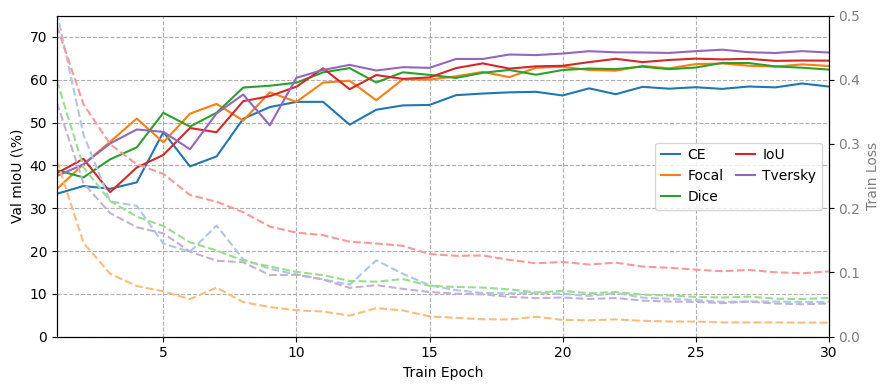

In [40]:
fig, ax_acc = plt.subplots(figsize=(9, 4))
ax_los = ax_acc.twinx()
cm = plt.cm.tab20(np.arange(0, 20))

for i, l in enumerate(loss_lst):
    ax_acc.plot(np.arange(1, 31), viou_dict[l][:30], '-', color=cm[2*i], label=l)
    ax_los.plot(np.arange(1, 31), tloss_dict[l][:30], '--', color=cm[2*i+1])

ax_acc.set_xlabel('Train Epoch')
ax_acc.set_xlim([1, 30])
ax_acc.set_ylabel('Val mIoU (\%)', color='k')
ax_acc.set_ylim([0, 75])
ax_acc.tick_params(axis='y', labelcolor='k')
ax_acc.grid(True, ls='--')
ax_los.set_ylabel('Train Loss', color=cm[14])
ax_los.set_ylim([0, 0.5])
ax_los.tick_params(axis='y', labelcolor=cm[14])
ax_los.grid(False)

ax_acc.legend(ncol=2, loc=5,
            columnspacing=0.9, handlelength=1.4, handletextpad=0.5,)

fig.tight_layout()
if issave:
    fig.savefig('./figs/train_curve.pdf', bbox_inches='tight')

## Loss by class vs Epoch

In [36]:
def plot_class(iou_lst):
    iou_mat = np.array(iou_lst).T
    fig, ax = plt.subplots(figsize=(8, 5))

    img = plt.imshow(iou_mat, interpolation='nearest', 
                    cmap=plt.cm.coolwarm_r, vmin=0.0, vmax=1.0)
    # set labels
    n_cls, n_epoch = iou_mat.shape
    fig.colorbar(img, ax=ax, fraction=0.046*n_cls/n_epoch, pad=0.04)
    labs = ['bckgrnd', 'person', 'bike', 'car', 'drone', 'boat', 'animal', 'obstacle', 'cnstn', 'plant', 'road', 'sky']
    ax.set(yticks=np.arange(n_cls), xticks=np.arange(4, 31, 5),
            yticklabels=labs, xticklabels=np.arange(5, 31, 5),
            ylabel='Val IoU by Class', xlabel='Train Epoch')

    fig.tight_layout()
    plt.show()
    return fig

def plot_class_call(dir_flag, sav_flag):
    file_log = os.path.join('../saved_models/', dir_flag, 'log.txt')
    with open(file_log, 'r') as f:
        s = f.read()

    it_epoch = re.finditer(
        r'iou class:' + ','.join([r'(\d+\.\d+)' for _ in range(12)]), s)
    iou_lst = []
    for e in it_epoch:
        iou_lst.append([float(e.group(c)) for c in range(1, 13)])

    fig = plot_class(iou_lst)
    if issave:
        fig.savefig('./figs/train_ciou_{}.pdf'.format(sav_flag), bbox_inches='tight')
    return fig

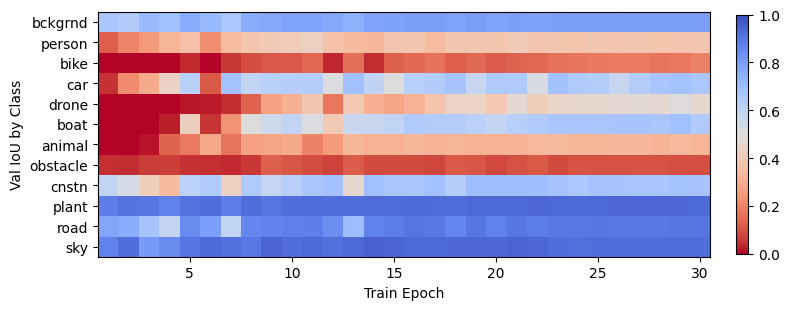

In [37]:
fig = plot_class_call(flag_lst[0], 'ce')

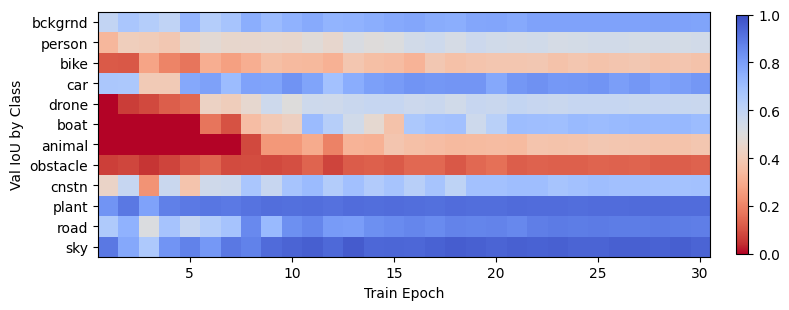

In [38]:
fig = plot_class_call(flag_lst[3], 'iou')

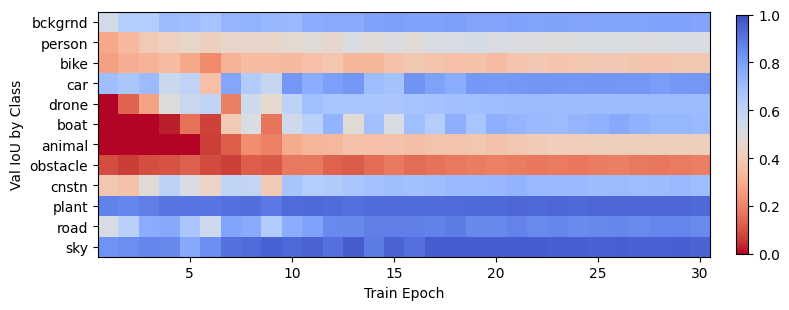

In [39]:
fig = plot_class_call(flag_lst[4], 'tversky')